In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv("data_science_job.csv")

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [4]:
df.shape

(19158, 13)

In [5]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [6]:
cols=[var for var in df.columns if df[var].isnull().mean() <0.05 and df[var].isnull().mean()>0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [7]:
df[cols].shape

(19158, 5)

In [8]:
X=df.drop(columns=["enrollee_id","company_type","gender","company_size","major_discipline"])
y=df["target"]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [11]:
mean_city_development_index=X_train["city_development_index"].mean()
median_city_development_index=X_train["city_development_index"].median()

mean_training_hours=X_train["training_hours"].mean()
median_training_hours=X_train["training_hours"].median()

mean_experience=X_train["experience"].mean()
median_experience=X_train["experience"].median()

In [12]:
X_train.loc[:,"city_development_index_mean"]=X_train["city_development_index"].fillna(mean_city_development_index)
X_train.loc[:,"city_development_index_median"]=X_train["city_development_index"].fillna(median_city_development_index)

X_train.loc[:,"training_hours_mean"]=X_train["training_hours"].fillna(mean_training_hours)
X_train.loc[:,"training_hours_median"]=X_train["training_hours"].fillna(median_training_hours)

X_train.loc[:,"experience_mean"]=X_train["experience"].fillna(mean_experience)
X_train.loc[:,"experience_median"]=X_train["experience"].fillna(median_experience)


In [13]:
X_train.sample(5)

,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,training_hours,target,city_development_index_mean,city_development_index_median,training_hours_mean,training_hours_median,experience_mean,experience_median
13810,city_61,0.913,Has relevent experience,no_enrollment,Graduate,6.0,304.0,0.0,0.913000,0.913,304.0,304.0,6.0,6.0
2941,city_16,0.910,Has relevent experience,no_enrollment,Masters,8.0,17.0,0.0,0.910000,0.910,17.0,17.0,8.0,8.0
11074,city_71,0.884,Has relevent experience,no_enrollment,Graduate,9.0,163.0,0.0,0.884000,0.884,163.0,163.0,9.0,9.0
13895,city_23,NaN,No relevent experience,no_enrollment,Masters,14.0,69.0,0.0,0.828672,0.903,69.0,69.0,14.0,14.0
4452,city_90,0.698,No relevent experience,Full time course,Masters,5.0,20.0,0.0,0.698000,0.698,20.0,20.0,5.0,5.0


In [14]:
import matplotlib.pyplot as plt

In [70]:
print('Original city_development_index variable variance: ', X_train['city_development_index'].var())
print('city_development_index Variance after median imputation: ', X_train['city_development_index_mean'].var())
print('city_development_index Variance after mean imputation: ', X_train['city_development_index_median'].var())

print('Original experience variable variance: ', X_train['experience'].var())
print('experience Variance after median imputation: ', X_train['experience_median'].var())
print('experience Variance after mean imputation: ', X_train['experience_mean'].var())

print('Original training hours variable variance: ', X_train['training_hours'].var())
print('training hours Variance after median imputation: ', X_train['training_hours_median'].var())
print('training hours Variance after mean imputation: ', X_train['training_hours_mean'].var())

Original city_development_index variable variance:  0.015232596622263282
city_development_index Variance after median imputation:  0.01484395418968221
city_development_index Variance after mean imputation:  0.014981311927511684
Original experience variable variance:  42.31272262041717
experience Variance after median imputation:  42.18027629640873
experience Variance after mean imputation:  42.17743234906967
Original training hours variable variance:  3605.7523453683775
training hours Variance after median imputation:  3474.8349974528564
training hours Variance after mean imputation:  3462.228108456488


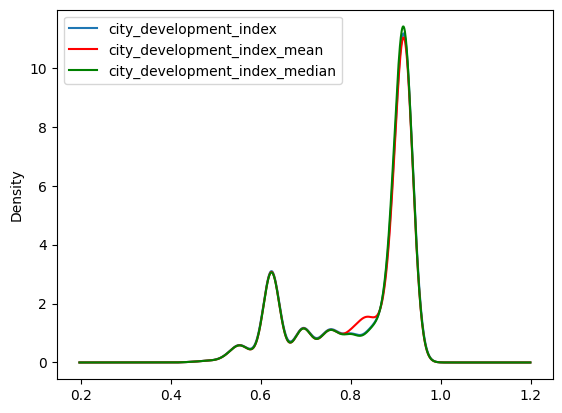

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['city_development_index'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['city_development_index_mean'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['city_development_index_median'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')